Apartat 1. Gràfics amb Matplotlib, Seaborn, Plotly i Dash

En el catàleg de dades obertes del Govern d'Espanya podem trobar una gran quantitat de conjunts de dades elaborats per l'Institut Nacional d'Estadística. En concret, nosaltres farem feina amb el dataset de naixements per edat de la mare i ordre de naixement. Podeu emprar el fitxer CSV separat ; (que també trobareu al repositori del curs).

Ens interessa agrupar les edats de la mare en els següents cinc grups:

    Fins a 19 anys
    De 20 a 29 anys
    De 30 a 39 anys
    De 40 a 49 anys
    50 anys o més

I també volem agrupar l'ordre de naixement de la mare (primer fill, segon fill, etc.) en els següents tres grups:

    Primer fill
    Segon fill
    Tercer fill o posterior

Fes un quadern de Colab on es generin els gràfics següents:

  1. Gràfic circular amb Matplotlib que mostri el percentatge de naixements a tot Espanya en 2023 segons el grup d'edat de la mare. Cada grup d'edat ha de tenir un color diferent. Fes servir una paleta de Seaborn per als colors.
  2. Gràfic de barres verticals agrupades amb Seaborn (sense mostrar la barra d'errors), que mostri en l'eix X les comunitats autònomes mediterrànies (Illes Balears, Catalunya, Comunitat Valenciana, Regió de Múrcia i Andalusia) i en l'eix Y el nombre de naixements en l'any 2023, amb els valors agrupats per grup d'edat. Per a una comunitat autònoma, podeu fer una barra per a cada grup d'edat, o bé una única barra amb colors diferents per a cada grup d'edat. En qualsevol cas, cada grup d'edat ha de tenir un mateix color en tot el gràfic i s'ha de mostrar en una llegenda.
  3. Gràfic de barres verticals agrupades amb Plotly (sense mostrar la barra d'errors), que mostri en l'eix X l'any (de 2009 a 2023) i en l'eix Y el nombre de naixements, agrupats per ordre de naixement (agrupats com hem dit abans, en primer, segon i tercer o posterior). Per a un any, podeu fer una barra per a cada ordre de naixement, o bé una única barra amb colors diferents per a cada ordre. En qualsevol cas, cada ordre de naixement ha de tenir un mateix color en tot el gràfic i s'ha de mostrar en una llegenda.
  4. Gràfic de línies i punts amb Seaborn que mostri l'evolució en el nombre de naixements a Espanya en el període 2009-2023. S'han de mostrar 3 línies, una per cada ordre de naixement (agrupats com hem dit abans). Cada una de les tres línies ha de tenir un color diferent i s'ha de mostrar en una llegenda.
  5. Gràfic de línies i punts amb Plotly que mostri l'evolució en el nombre de naixements a les Illes Balears en el període 2009-2023. S'han de mostrar 5 línies, una per cada grup d'edat de la mare. Cada una de les cinc línies ha de tenir un color diferent i s'ha de mostrar en una llegenda.
  6. Diagrama de caixes (boxplot) amb Seaborn que mostri el nombre de naixements a les Illes Balears al llarg del període 2009-2023, per a cada un dels grups d'edat. Cada grup d'edat ha de tenir un color diferent i s'ha de mostrar en una llegenda.
  7. Diagrama de caixes (boxplot) amb Plotly que mostri el nombre total de naixements del període 2009-2023, per a cada comunitat autònoma mediterrània. Cada comunitat autònoma ha de tenir un color diferent i s'ha de mostrar en una llegenda.
  8. Interfície amb Dash que permeti seleccionar una comunitat o ciutat autònoma, i mostri un diagrama de barres verticals agrupades que mostri en l'eix X el grup d'edat, en l'eix Y el nombre de naixements, amb els valors agrupats per ordre de naixement (primer fill, segon fill, etc.). Cada ordre de naixement ha de tenir un color diferent i s'ha de mostrar en una llegenda.


Tots els gràfics han de tenir un títol. I quan tenguin eixos, també s'hi ha d'incloure una etiqueta per a cada eix.

In [123]:
!pip install dash
!pip install datashader

In [124]:
import pandas as pd

df = pd.read_csv('https://raw.githubusercontent.com/tnavarrete-iedib/bigdata-24-25/refs/heads/main/naixements.csv', sep=';', dtype={'Total': str})
df.head()
# Categoritzacio i classificacio
# Fun fact 1: Una de les maravelles de aquests csvs es que la edat es una string, perfecte per tractar dades :)
def filteredEdad(age):
  if age == 'Todas las edades':
    return None
  elif age in ['Menos de 15 años', '15 años', '16 años', '17 años', '18 años', '19 años']:
    return 'less_or_19'
  elif age in ['20 años', '21 años', '22 años', '23 años', '24 años', '25 años', '26 años', '27 años', '28 años', '29 años']:
    return '20_to_29'
  elif age in ['30 años', '31 años', '32 años', '33 años', '34 años', '35 años', '36 años', '37 años', '38 años', '39 años']:
    return '30_to_39'
  elif age in ['40 años', '41 años', '42 años', '43 años', '44 años', '45 años', '46 años', '47 años', '48 años', '49 años']:
    return '40_to_49'
  else:
    return 'more_than_50'

def filteredOrdre(order):
  if order=='Todos':
    return None
  elif order=='Primero':
    return '1_fill'
  elif order=='Segundo':
    return '2_fills'
  else:
    return '2_o_mes'

# Fun fact 2: la columna total dona problemes, perque es un float
df['Total'] = df['Total'].apply(lambda x: str(x).replace('.', '')).astype(int)
# Amb aixo canviar i formateam el nombre

1. Gràfic circular amb Matplotlib que mostri el percentatge de naixements a tot Espanya en 2023 segons el grup d'edat de la mare. Cada grup d'edat ha de tenir un color diferent. Fes servir una paleta de Seaborn per als colors.

([<matplotlib.patches.Wedge at 0x7d7e20c70b50>,
 [Text(0.7738982851866358, 0.7817169847106973, '20-29 anys'),
  Text(-1.0142933125213005, -0.42568659383937324, '30-39 anys'),
  Text(0.9907756431374082, -0.47787406810336064, '40-49 anys'),
  Text(1.0981081877873011, -0.06448571868630948, '≤19 anys'),
  Text(1.0999970595413746, -0.0025434229552691082, '50+ anys')],
 [Text(0.4221263373745286, 0.42639108256947117, '25.16%'),
  Text(-0.5532508977388911, -0.232192687548749, '62.33%'),
  Text(0.5404230780749498, -0.26065858260183306, '10.72%'),
  Text(0.5989681024294369, -0.035174028374350616, '1.72%'),
  Text(0.599998396113477, -0.001387321611964968, '0.07%')])

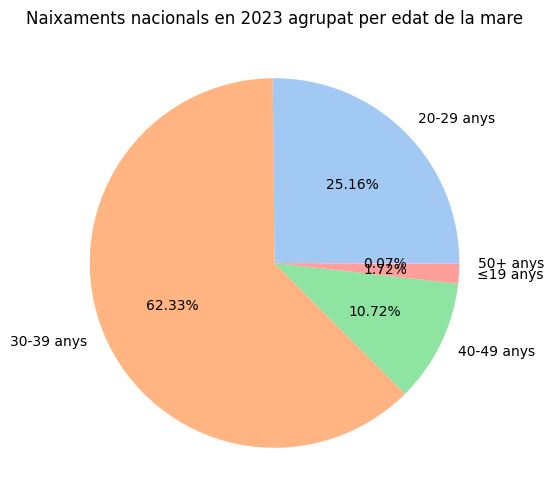

In [125]:
import seaborn as sns
import matplotlib.pyplot as plt


exercici1 = df[(df['Periodo'] == 2023) & (df['Nacional y Comunidades autónomas'] == 'Total Nacional') & (df['Orden del nacido vivo'] == 'Todos')].copy()
exercici1['Grup edat'] = exercici1['Edad de la madre'].apply(filteredEdad)
result = exercici1.groupby('Grup edat')['Total'].sum().reset_index()

label_map = {
    '20_to_29': '20-29 anys',
    '30_to_39': '30-39 anys',
    '40_to_49': '40-49 anys',
    'more_than_50': '50+ anys',
    'less_or_19': '≤19 anys'
}

plt.figure(figsize=(12, 6))
color_palette = sns.color_palette('pastel', len(result))
plt.title('Naixaments nacionals en 2023 agrupat per edat de la mare')
plt.pie(result['Total'],
        labels=[label_map.get(x, x) for x in result['Grup edat']],
        autopct='%1.2f%%',
        colors=color_palette)


2. Gràfic de barres verticals agrupades amb Seaborn (sense mostrar la barra d'errors), que mostri en l'eix X les comunitats autònomes mediterrànies (Illes Balears, Catalunya, Comunitat Valenciana, Regió de Múrcia i Andalusia) i en l'eix Y el nombre de naixements en l'any 2023, amb els valors agrupats per grup d'edat. Per a una comunitat autònoma, podeu fer una barra per a cada grup d'edat, o bé una única barra amb colors diferents per a cada grup d'edat. En qualsevol cas, cada grup d'edat ha de tenir un mateix color en tot el gràfic i s'ha de mostrar en una llegenda.

([0, 1, 2, 3, 4],
 [Text(0, 0, 'Andalucia'),
  Text(1, 0, 'Illes Balears'),
  Text(2, 0, 'Catalunya'),
  Text(3, 0, 'Comunitat Valenciana'),
  Text(4, 0, 'Murcia')])

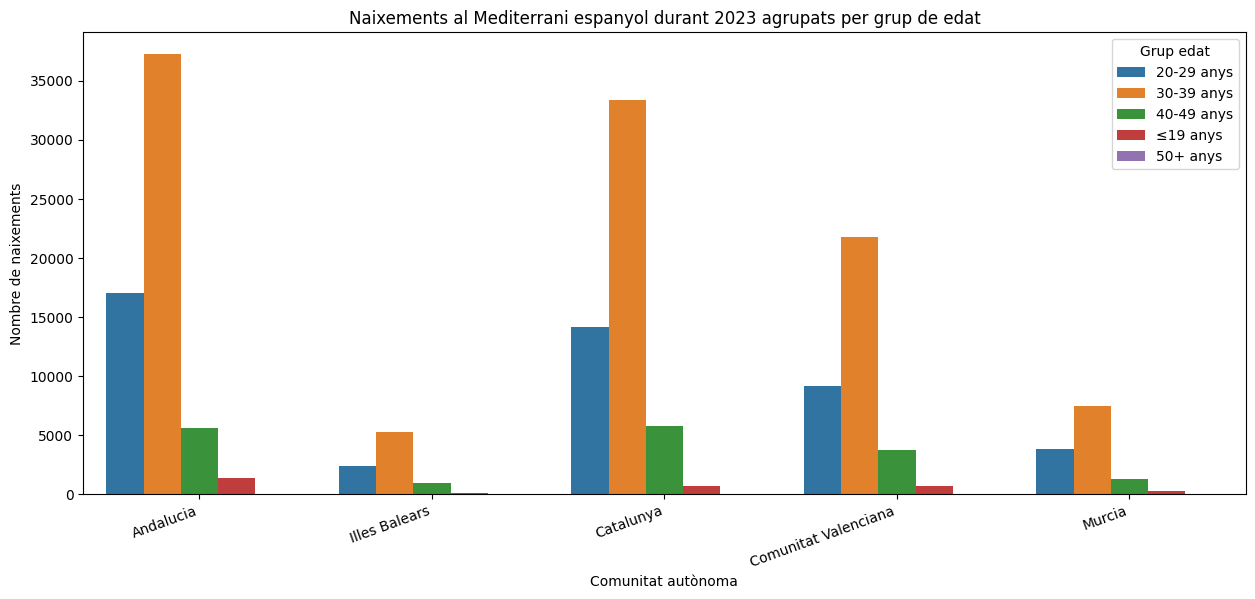

In [126]:
llistat_comunitats = {
    '01 Andalucía': 'Andalucia',
    '04 Balears, Illes': 'Illes Balears',
    '09 Cataluña': 'Catalunya',
    '10 Comunitat Valenciana': 'Comunitat Valenciana',
    '14 Murcia, Región de': 'Murcia',
}
exercici2 = df[(df['Periodo'] == 2023) & (df['Nacional y Comunidades autónomas'].isin(llistat_comunitats.keys()))
             & (df['Orden del nacido vivo'] == 'Todos')].copy()
exercici2['Grup edat'] = exercici2['Edad de la madre'].apply(filteredEdad)
filtered_data = exercici2.groupby(['Nacional y Comunidades autónomas','Grup edat'])['Total'].sum().reset_index()
filtered_data['Comunitat autònoma'] = filtered_data['Nacional y Comunidades autónomas'].map(llistat_comunitats)

plt.figure(figsize=(15, 6))
sns.barplot(
    data=filtered_data,
    x='Comunitat autònoma',
    y='Total',
    hue='Grup edat',
    dodge=True,
)
label_map = {
    '20_to_29': '20-29 anys',
    '30_to_39': '30-39 anys',
    '40_to_49': '40-49 anys',
    'more_than_50': '50+ anys',
    'less_or_19': '≤19 anys'
}
# Get the current handles and labels
handles, labels = plt.gca().get_legend_handles_labels()
# Create new labels using the mapping
new_labels = [label_map.get(label, label) for label in labels]

plt.legend(handles, new_labels, title='Grup edat')
plt.title('Naixements al Mediterrani espanyol durant 2023 agrupats per grup de edat')
plt.xlabel('Comunitat autònoma')
plt.ylabel('Nombre de naixements')
plt.xticks(rotation=20, ha='right')

3. Gràfic de barres verticals agrupades amb Plotly (sense mostrar la barra d'errors), que mostri en l'eix X l'any (de 2009 a 2023) i en l'eix Y el nombre de naixements, agrupats per ordre de naixement (agrupats com hem dit abans, en primer, segon i tercer o posterior). Per a un any, podeu fer una barra per a cada ordre de naixement, o bé una única barra amb colors diferents per a cada ordre. En qualsevol cas, cada ordre de naixement ha de tenir un mateix color en tot el gràfic i s'ha de mostrar en una llegenda.

In [127]:
import plotly.express as px

exercici3 = df[(df['Periodo'].between(2009, 2023))
              & (df['Orden del nacido vivo'] != 'Todos')
              & (df['Edad de la madre'] == 'Todas las edades')
              & (df['Nacional y Comunidades autónomas'] == 'Total Nacional') ].copy()

exercici3['Birth order'] = exercici3['Orden del nacido vivo'].apply(filteredOrdre)
filteredData = exercici3.groupby(['Periodo','Birth order'])['Total'].sum().reset_index()

fig = px.bar(
    filteredData,
    x='Periodo',
    y='Total',
    color='Birth order',
    barmode='group',
    labels={'Periodo': 'Any', 'Total': 'Nombre de naixements', 'Birth order': 'Ordre de naixements'},
    title='Naixaments per any i ordre de 2009 a 2023)'
)
fig.update_layout(xaxis=dict(tickmode='linear', dtick=1))
fig.show()

4. Gràfic de línies i punts amb Seaborn que mostri l'evolució en el nombre de naixements a Espanya en el període 2009-2023. S'han de mostrar 3 línies, una per cada ordre de naixement (agrupats com hem dit abans). Cada una de les tres línies ha de tenir un color diferent i s'ha de mostrar en una llegenda.


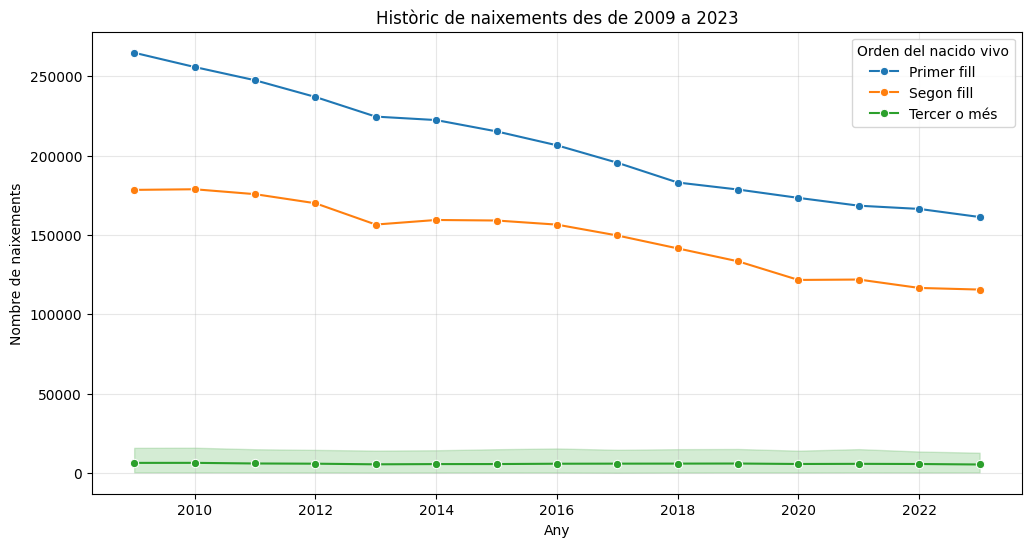

In [128]:
filtered_data = df[(df['Periodo'].between(2009, 2023)) &
                  (df['Orden del nacido vivo'] != 'Todos') &
                  (df['Edad de la madre'] == 'Todas las edades') &
                  (df['Nacional y Comunidades autónomas'] == 'Total Nacional')].copy()

def order_map(number):
    if(number == 'Primero'):
        return 'Primer fill'
    elif(number == 'Segundo'):
        return 'Segon fill'
    else:
        return 'Tercer o més'

filtered_data['Orden del nacido vivo'] = filtered_data['Orden del nacido vivo'].apply(order_map)

plt.figure(figsize=(12, 6))
sns.lineplot(
    data=filtered_data,
    x='Periodo',
    y='Total',
    hue='Orden del nacido vivo',
    marker='o'
)

plt.title('Històric de naixements des de 2009 a 2023')
plt.xlabel('Any')
plt.ylabel('Nombre de naixements')
plt.grid(True, alpha=0.3)
plt.xticks(rotation=0)
plt.show()

5. Gràfic de línies i punts amb Plotly que mostri l'evolució en el nombre de naixements a les Illes Balears en el període 2009-2023. S'han de mostrar 5 línies, una per cada grup d'edat de la mare. Cada una de les cinc línies ha de tenir un color diferent i s'ha de mostrar en una llegenda.

In [129]:
def create_balearic_births_df(df, start_year=2009, end_year=2023):
    mask = (
        (df['Nacional y Comunidades autónomas'] == '04 Balears, Illes') &
        (df['Periodo'].between(start_year, end_year)) &
        (df['Orden del nacido vivo'] == 'Todos')
    )
    df_balearic = df[mask].copy()
    df_balearic['Age group'] = df_balearic['Edad de la madre'].apply(filteredEdad)
    return df_balearic.groupby(['Periodo', 'Age group'])['Total'].sum().reset_index()


age_group_labels = {
    '20_to_29': '20-29 years',
    '30_to_39': '30-39 years',
    '40_to_49': '40-49 years',
    'more_than_50': '50+ years',
    'less_or_19': '≤19 years'
}


filtered_data = create_balearic_births_df(df)
filtered_data['Age group'] = filtered_data['Age group'].map(age_group_labels)


fig = px.line(
    filtered_data,
    x='Periodo',
    y='Total',
    color='Age group',
    markers=True,
    title='Evolució dels naixements des de 2009 a 2023 per grup de edat',
    labels={
        'Total': 'Nombre de naixements',
        'Periodo': 'Any',
        'Age group': 'Grup edat'
    },
    template='plotly_white'
)
fig.update_layout(
    title=dict(
        x=0.5,
        xanchor='center',
        font=dict(size=20)
    ),
    legend=dict(
        title_font=dict(size=14),
        font=dict(size=12),
        yanchor="top",
        y=0.99,
        xanchor="left",
        x=0.01
    ),
    xaxis=dict(
        tickmode='linear',
        dtick=1,
        gridcolor='lightgray'
    ),
    yaxis=dict(
        gridcolor='lightgray',
        title_standoff=25
    ),
    plot_bgcolor='white',
    paper_bgcolor='white',
    hovermode='x unified'
)

fig.update_traces(
    line=dict(width=2),
    marker=dict(size=8),
    hovertemplate='<b>%{customdata}</b><br>' +
                  'Year: %{x}<br>' +
                  'Births: %{y:,.0f}<extra></extra>'
)

fig.update_traces(
    customdata=filtered_data['Age group']
)

fig.show()

6. Diagrama de caixes (boxplot) amb Seaborn que mostri el nombre de naixements a les Illes Balears al llarg del període 2009-2023, per a cada un dels grups d'edat. Cada grup d'edat ha de tenir un color diferent i s'ha de mostrar en una llegenda.



Original age groups in the data:
['Todas las edades']


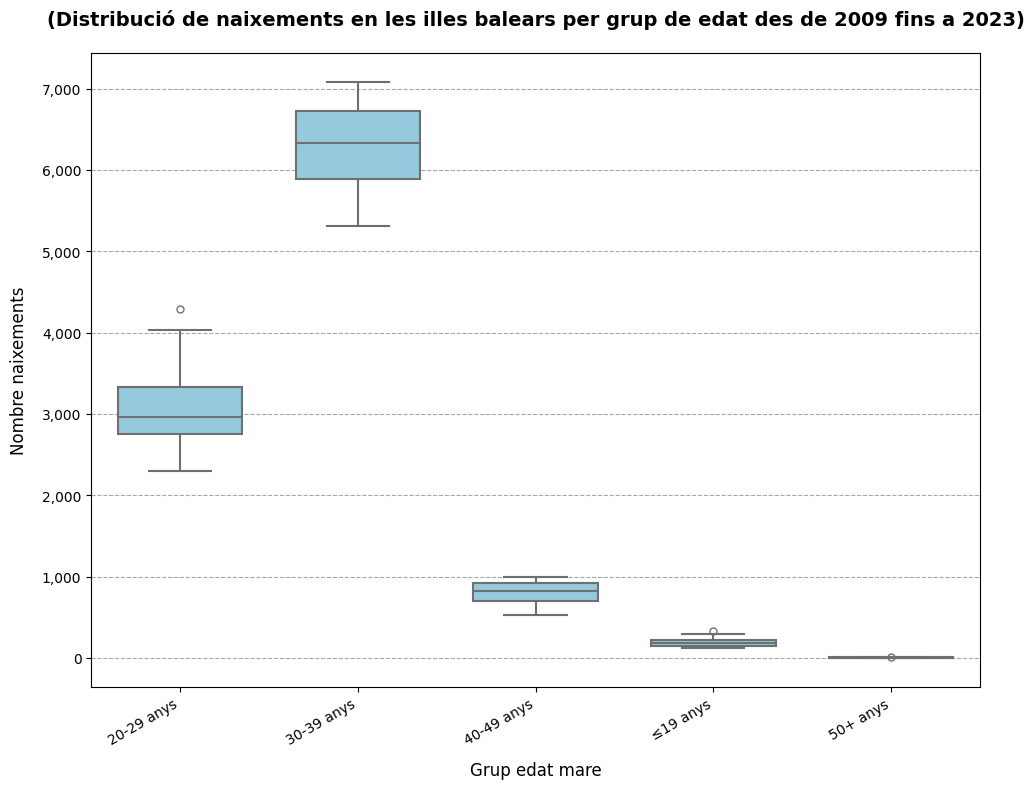

In [130]:
# First, let's see what we're working with
print("Original age groups in the data:")
print(exercici3['Edad de la madre'].unique())

# Redefine our data preparation
def create_balearic_births_df(df, start_year=2009, end_year=2023):
    mask = (
        (df['Nacional y Comunidades autónomas'] == '04 Balears, Illes') &
        (df['Periodo'].between(start_year, end_year)) &
        (df['Orden del nacido vivo'] == 'Todos')
    )
    df_balearic = df[mask].copy()
    df_balearic['Age group'] = df_balearic['Edad de la madre'].apply(filteredEdad)
    return df_balearic.groupby(['Periodo', 'Age group'])['Total'].sum().reset_index()

age_group_labels = {
    '20_to_29': '20-29 anys',
    '30_to_39': '30-39 anys',
    '40_to_49': '40-49 anys',
    'more_than_50': '50+ anys',
    'less_or_19': '≤19 anys'
}

filtered_data = create_balearic_births_df(df)
filtered_data['Age group'] = filtered_data['Age group'].map(age_group_labels)

def create_boxplot_balearic_births(data, figsize=(10, 8)):
    plt.figure(figsize=figsize)

    # Get the unique age groups present in the data
    unique_age_groups = data['Age group'].unique()

    ax = sns.boxplot(
        data=data,
        x='Age group',
        y='Total',
        # Use the unique age groups for the order
        order=unique_age_groups,
        color='skyblue',
        width=0.7,
        fliersize=5,
        linewidth=1.5
    )

    plt.title(
        "(Distribució de naixements en les illes balears per grup de edat des de 2009 fins a 2023)",
        pad=20,
        fontsize=14,
        fontweight='bold'
    )

    plt.xlabel("Grup edat mare", fontsize=12, labelpad=10)
    plt.ylabel("Nombre naixements", fontsize=12, labelpad=10)

    plt.xticks(
        rotation=30,
        ha='right',
        fontsize=10
    )

    plt.grid(
        True,
        axis='y',
        linestyle='--',
        alpha=0.7,
        color='gray'
    )

    ax.yaxis.set_major_formatter(
        plt.FuncFormatter(lambda x, p: format(int(x), ','))
    )

    plt.tight_layout()
    return plt.gcf()

# Create and display the plot
fig = create_boxplot_balearic_births(filtered_data)
plt.show()

7. Diagrama de caixes (boxplot) amb Plotly que mostri el nombre total de naixements del període 2009-2023, per a cada comunitat autònoma mediterrània. Cada comunitat autònoma ha de tenir un color diferent i s'ha de mostrar en una llegenda.

In [131]:
exercici7 = df[(df['Periodo'].between(2009, 2023))
             & (df['Nacional y Comunidades autónomas'].isin(llistat_comunitats.keys()))
             & (df['Edad de la madre'] == 'Todas las edades')
             & (df['Orden del nacido vivo'] == 'Todos')]

filtered_data = exercici7.groupby(['Periodo','Nacional y Comunidades autónomas'])['Total'].sum().reset_index()

fig = px.box(
    filtered_data,
    x="Nacional y Comunidades autónomas",
    y="Total",
    color="Nacional y Comunidades autónomas",
    labels={
        "Nacional y Comunidades autónomas": "Comunitat Autònoma",
        "Total": "Nombre de naixements"
    },
    title="Nombre de naixements a les comunitats de costa Mediterrania des de 2009 a 2023",
)
fig.show()

8. Interfície amb Dash que permeti seleccionar una comunitat o ciutat autònoma, i mostri un diagrama de barres verticals agrupades que mostri en l'eix X el grup d'edat, en l'eix Y el nombre de naixements, amb els valors agrupats per ordre de naixement (primer fill, segon fill, etc.). Cada ordre de naixement ha de tenir un color diferent i s'ha de mostrar en una llegenda.

In [132]:

from dash import Dash, dcc, html, Input, Output
import plotly.express as px

def create_dropdown_options():
  return [
    {'label': 'Andalucia', 'value': '01 Andalucía'},
    {'label': 'Aragó', 'value': '02 Aragón'},
    {'label': 'Asturies', 'value': '03 Asturias, Principality of'},
    {'label': 'Illes Balears', 'value': '04 Balears, Illes'},
    {'label': 'Canaries', 'value': '05 Canarias'},
    {'label': 'Cantabria', 'value': '06 Cantabria'},
    {'label': 'Castella i Lleó', 'value': '07 Castilla y León'},
    {'label': 'Castilla La Manxa', 'value': '08 Castilla - La Mancha'},
    {'label': 'Catalunya', 'value': '09 Cataluña'},
    {'label': 'Comunitat Valenciana', 'value': '10 Comunitat Valenciana'},
    {'label': 'Extremadura', 'value': '11 Extremadura'},
    {'label': 'Galicia', 'value': '12 Galicia'},
    {'label': 'Madrid', 'value': '13 Madrid, Community of'},
    {'label': 'Regió of Murcia', 'value': '14 Murcia, Región de'},
    {'label': 'Navarra', 'value': '15 Navarra, Chartered Community of'},
    {'label': 'País Basc', 'value': '16 País Vasco'},
    {'label': 'La Rioja', 'value': '17 Rioja, La'},
    {'label': 'Ceuta', 'value': '18 Ceuta'},
    {'label': 'Melilla', 'value': '19 Melilla'}
]


def process_birth_data(df):
   mask = (
       (df['Nacional y Comunidades autónomas'] != 'Total Nacional') &
       (df['Edad de la madre'] != 'Todas las edades') &
       (df['Orden del nacido vivo'] != 'Todos')
   )
   df_filtered = df[mask].copy()
   df_filtered['Age group'] = df_filtered['Edad de la madre'].apply(filteredEdad)
   df_filtered['Birth Order'] = df_filtered['Orden del nacido vivo'].apply(filteredOrdre)
   return df_filtered

def create_layout():
   return html.Div([
       html.H1('Naixements per edat i ordre', className='text-center mb-4'),
       dcc.Dropdown(
           id='region-dropdown',
           options=create_dropdown_options(),
           value='04 Balears, Illes',
           className='mb-4'
       ),
       dcc.Graph(id='birth-distribution-graph')
   ])

def create_bar_chart(data, selected_region):
   filtered_data = data[
       data['Nacional y Comunidades autónomas'] == selected_region
   ].groupby(['Age group', 'Birth Order'])['Total'].sum().reset_index()

   return px.bar(
       filtered_data,
       x='Age group',
       y='Total',
       color='Birth Order',
       barmode='group',
       labels={
           'Total': 'Nombre de naixements',
           'Age group': 'Grup de edat de la mare'
       },
       title=f'Distribució de edat a {selected_region}',
       template='plotly_white'
   )

app = Dash(__name__)
app.layout = create_layout()

@app.callback(
   Output('birth-distribution-graph', 'figure'),
   Input('region-dropdown', 'value')
)
def update_graph(selected_region):
   df_processed = process_birth_data(df)
   return create_bar_chart(df_processed, selected_region)

if __name__ == '__main__':
   app.run_server(debug=True)

<IPython.core.display.Javascript object>